In [79]:
library(tidyverse)
library(reshape)
library(ucidata)
data(wine)


In [80]:
summary(wine)

 fixed_acidity    volatile_acidity  citric_acid     residual_sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500   1st Qu.: 1.800  
 Median : 7.000   Median :0.2900   Median :0.3100   Median : 3.000  
 Mean   : 7.215   Mean   :0.3397   Mean   :0.3186   Mean   : 5.443  
 3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900   3rd Qu.: 8.100  
 Max.   :15.900   Max.   :1.5800   Max.   :1.6600   Max.   :65.800  
   chlorides       free_sulfur_dioxide total_sulfur_dioxide    density      
 Min.   :0.00900   Min.   :  1.00      Min.   :  6.0        Min.   :0.9871  
 1st Qu.:0.03800   1st Qu.: 17.00      1st Qu.: 77.0        1st Qu.:0.9923  
 Median :0.04700   Median : 29.00      Median :118.0        Median :0.9949  
 Mean   :0.05603   Mean   : 30.53      Mean   :115.7        Mean   :0.9947  
 3rd Qu.:0.06500   3rd Qu.: 41.00      3rd Qu.:156.0        3rd Qu.:0.9970  
 Max.   :0.61100   Max.   :289.00      Max.   :440.0   

In [81]:
head(wine)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,Red


Using color as id variables



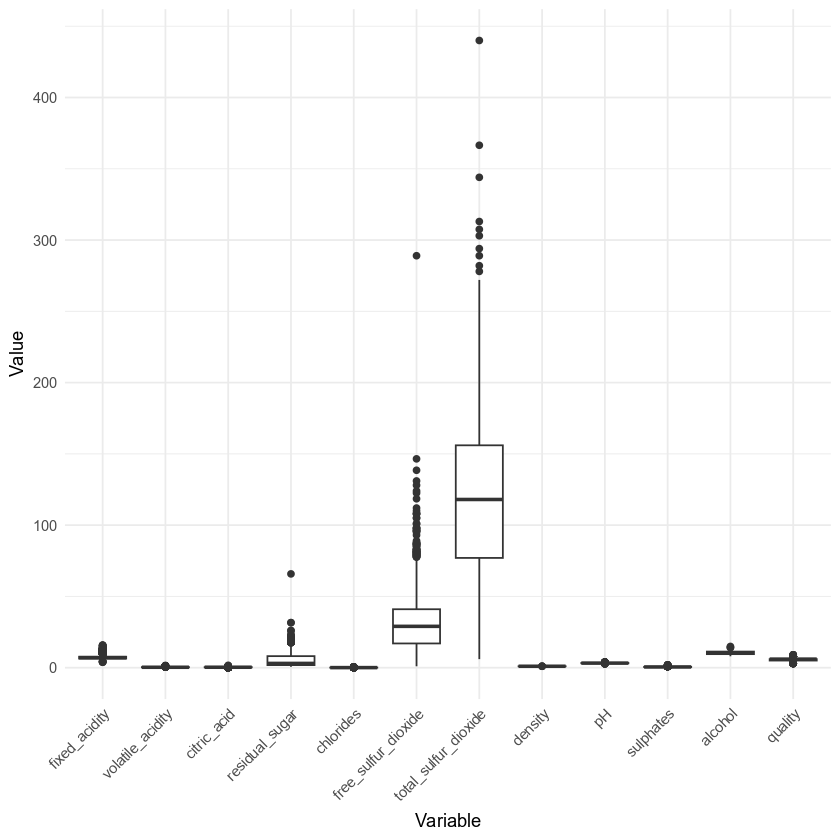

In [82]:
melted <- melt(wine)

ggplot(melted, aes(x = variable, y = value)) +
  geom_boxplot() +
  theme_minimal() +
  xlab("Variable") +
  ylab("Value") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Filter out outliers

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


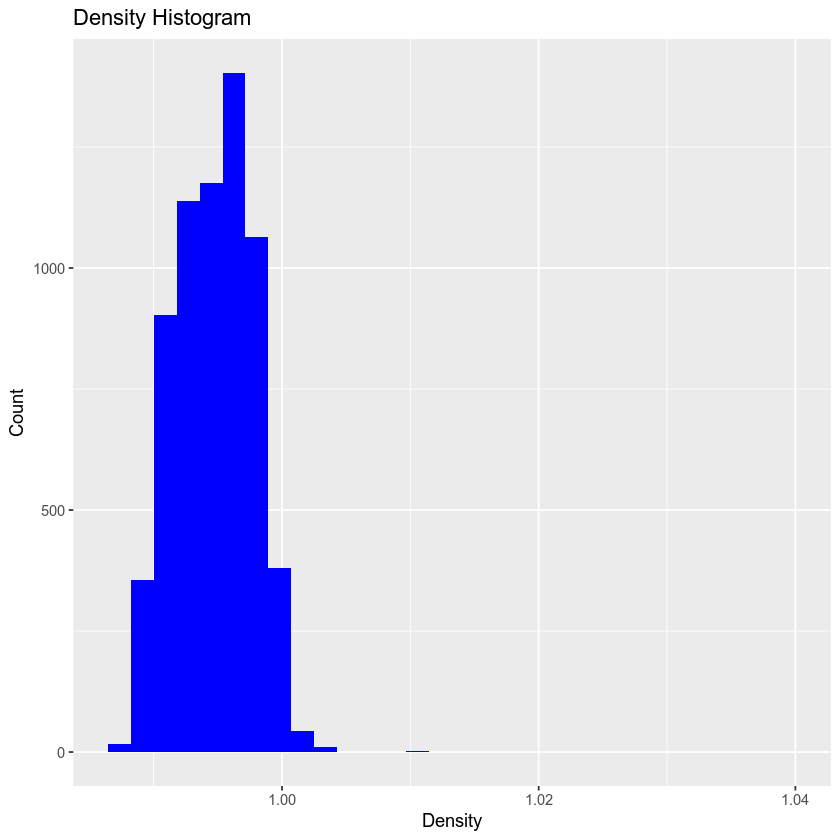

In [83]:
ggplot(data = wine, aes(x = density)) +
    geom_histogram(fill='blue') +
    labs(title='Density Histogram', x='Density', y='Count')
    

In [84]:
qnt <- quantile(wine$density, probs=c(.25, .75))
iqr <- qnt[2] - qnt[1]

lower_bound <- qnt[1] - 1.5 * iqr
upper_bound <- qnt[2] + 1.5 * iqr

# Filter out the outliers
wine_filtered <- subset(wine, density >= lower_bound & density <= upper_bound)

### Logistic Regression of Sulfur and Wine Type

In [85]:
wine_filtered <- wine_filtered %>% 
    mutate(bin_color = ifelse(wine_filtered$color == 'Red', 1, 0))

Warning message in geom_smooth(method = "loess", family = "binomial", se = FALSE):
“Ignoring unknown parameters: `family`”


`geom_smooth()` using formula = 'y ~ x'


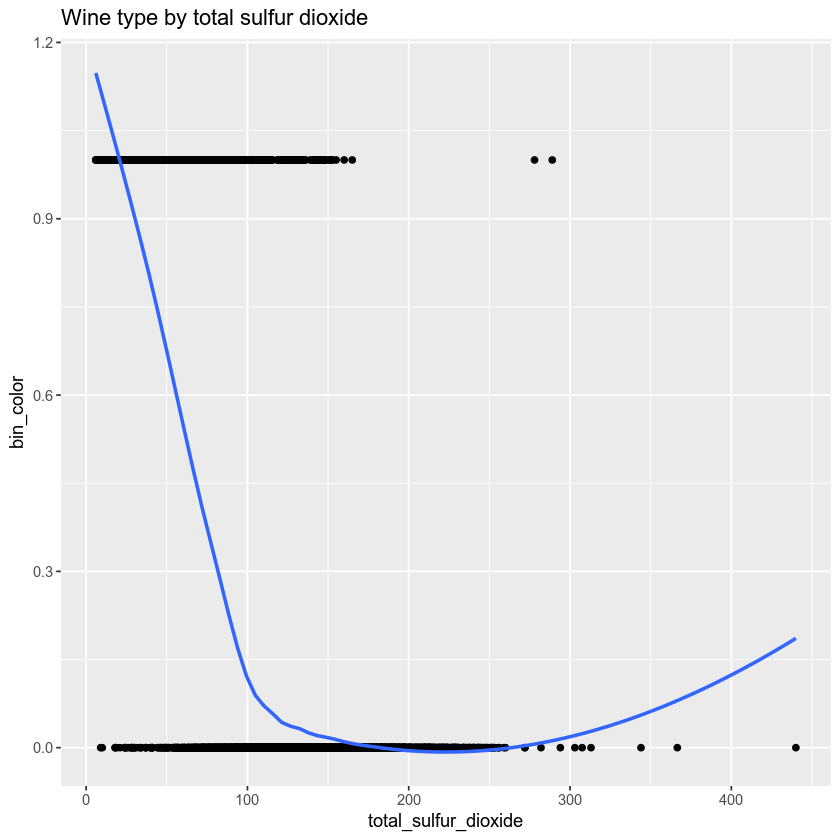

In [86]:
ggplot(data = wine_filtered, aes(x = total_sulfur_dioxide, y=bin_color)) +
    geom_point() + 
    geom_smooth(method='loess', family='binomial', se = FALSE)+
    labs(title='Wine type by total sulfur dioxide')

Density and Wine type

Warning message in geom_smooth(method = "loess", family = "binomial", se = FALSE):
“Ignoring unknown parameters: `family`”
`geom_smooth()` using formula = 'y ~ x'


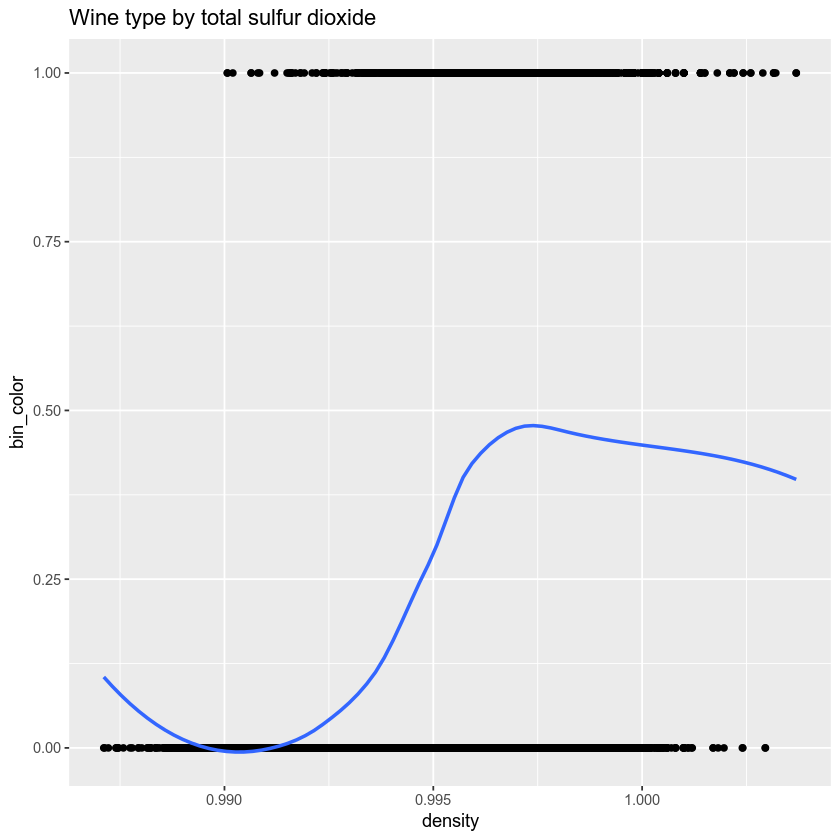

In [87]:
ggplot(data = wine_filtered, aes(x = density, y=bin_color)) +
    geom_point() + 
    geom_smooth(method='loess', family='binomial', se = FALSE)+
    labs(title='Wine type by total sulfur dioxide')

It seems Total Sulfur Dioxide and Density have inverse relationships with wine type, High density vinyards seem to have more red wines where as high sulfur vinyards have white wines. 

### Co Plots

In [88]:
wine_filtered$density_group <- cut_number(wine_filtered$density, n = 5)

Warning message in geom_smooth(method = "loess", family = "binomial", se = FALSE):
“Ignoring unknown parameters: `family`”
`geom_smooth()` using formula = 'y ~ x'


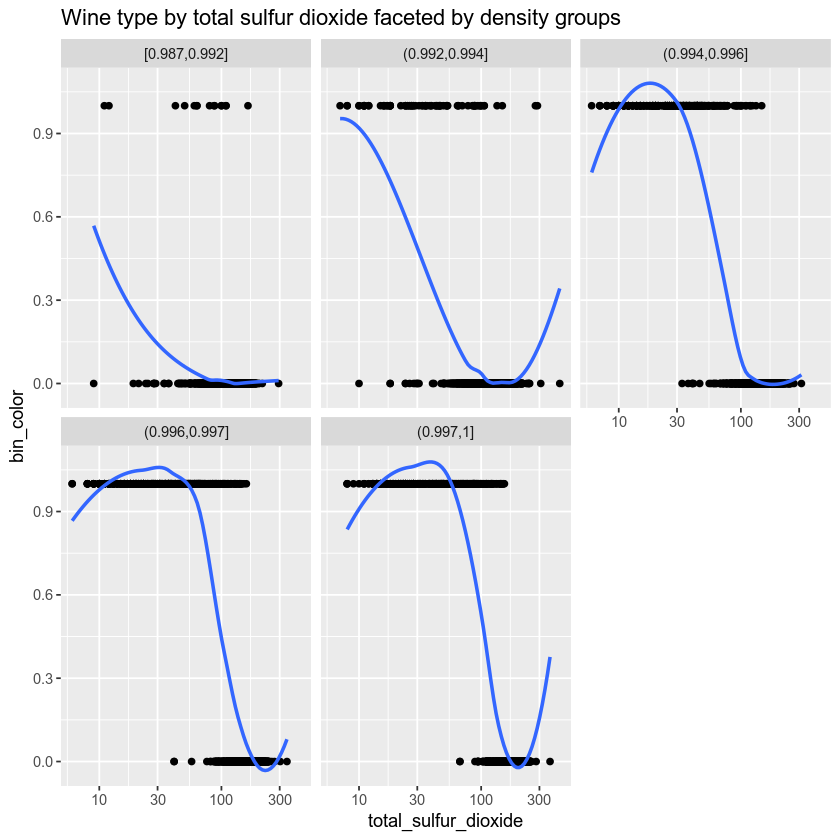

In [95]:
ggplot(data = wine_filtered, aes(x = total_sulfur_dioxide, y=bin_color)) +
    geom_point() + 
    geom_smooth(method='loess', family='binomial', se = FALSE) +
    facet_wrap(~ density_group) +
    scale_x_log10() +
    labs(title='Wine type by total sulfur dioxide faceted by density groups')

Warning message in geom_smooth(method = "loess", family = "binomial", se = FALSE):
“Ignoring unknown parameters: `family`”
`geom_smooth()` using formula = 'y ~ x'


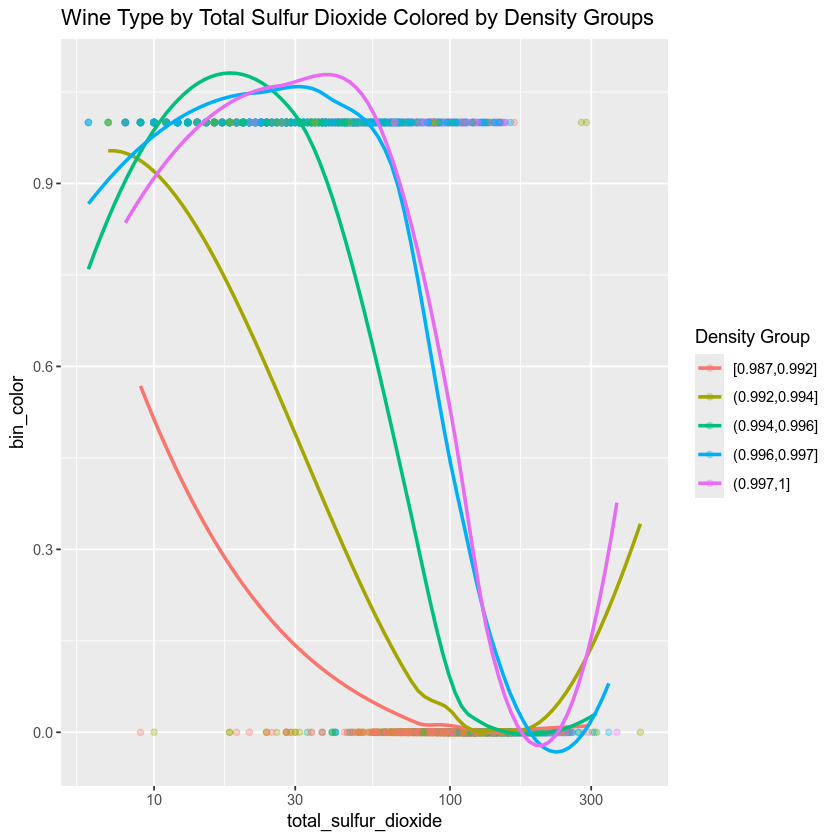

In [97]:
ggplot(data = wine_filtered, aes(x = total_sulfur_dioxide, y = bin_color, color = density_group)) +
  geom_point(alpha = 0.3) + 
  geom_smooth(method = 'loess', family = 'binomial', se = FALSE) +
  scale_x_log10() +
  labs(title = 'Wine Type by Total Sulfur Dioxide Colored by Density Groups',
       color = 'Density Group')

In [90]:
wine_filtered$tsd_group <- cut_number(wine_filtered$total_sulfur_dioxide, n = 5)

Warning message in geom_smooth(method = "loess", family = "binomial", se = FALSE):
“Ignoring unknown parameters: `family`”
`geom_smooth()` using formula = 'y ~ x'


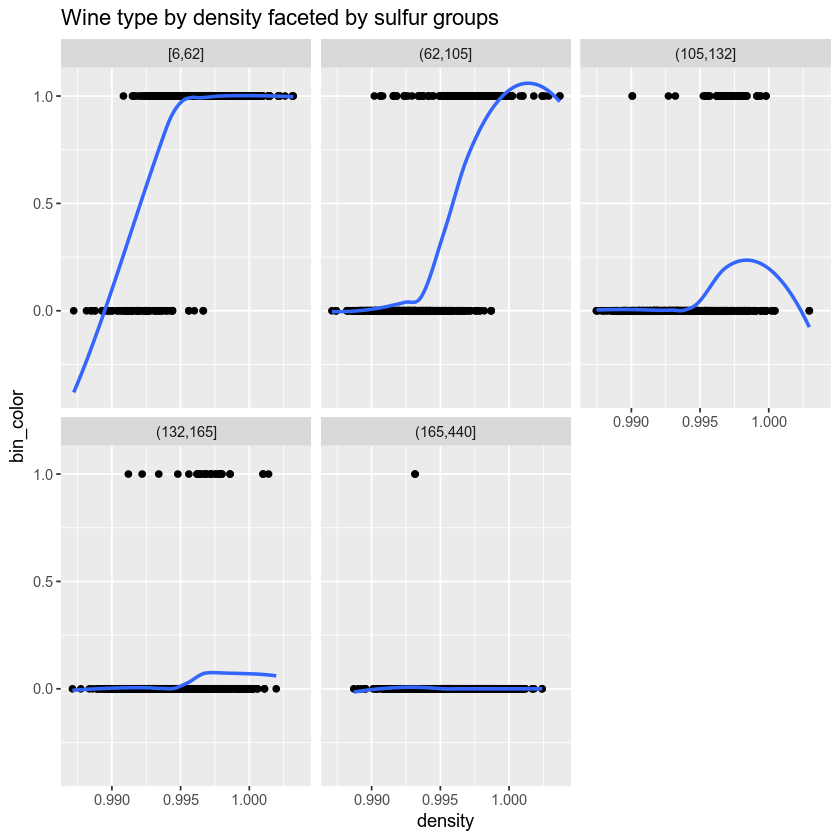

In [100]:
ggplot(data = wine_filtered, aes(x = density, y=bin_color)) +
    geom_point() + 
    geom_smooth(method='loess', family='binomial', se = FALSE) +
    facet_wrap(~ tsd_group) +
    labs(title='Wine type by density faceted by sulfur groups')

Warning message in geom_smooth(method = "loess", family = "binomial", se = FALSE):
“Ignoring unknown parameters: `family`”


`geom_smooth()` using formula = 'y ~ x'


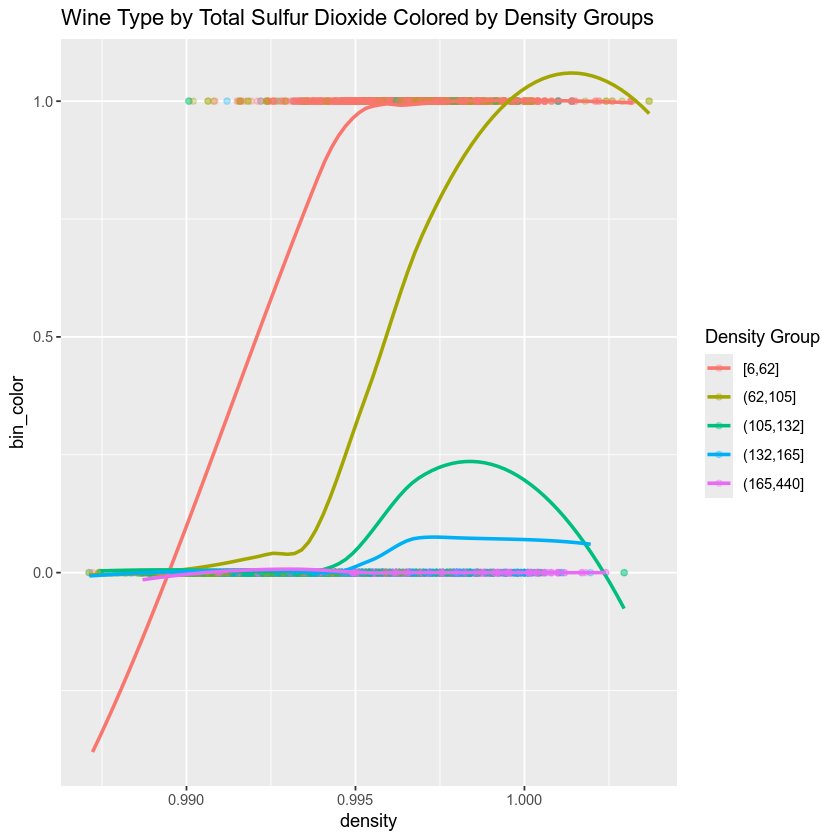

In [ ]:
ggplot(data = wine_filtered, aes(x = density, y = bin_color, color = tsd_group)) +
  geom_point(alpha = 0.3) + 
  geom_smooth(method = 'loess', family = 'binomial', se = FALSE) +
  labs(title = 'Wine Type by Total Sulfur Dioxide Colored by Density Groups',
       color = 'Density Group')

### Discussion

It seems that Sulfur Dioxide and Density have some interactions, large sulfur values show a weaker relationship between density and wine type. A similar pattern emerges in low density groups which have a weaker